In [25]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

In [26]:
df=pd.read_csv('Preprocessed_Data_Improved_By_VASU_N1.csv',index_col=0)

In [27]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,C_FirstPaymentDate,Maturity_Year,Maturity_Month,C_MaturityDate
0,711.841009,0,16974,25,1,O,89,27.0,117000,89.0,...,Major Banks,0,0,52,1999,2,1999-02-01,2029,1,2029-01-01
1,711.841009,0,19740,0,1,O,73,17.0,109000,73.0,...,Non-Bank Servicers,0,0,144,1999,2,1999-02-01,2029,1,2029-01-01
2,711.841009,0,29940,0,1,O,75,16.0,88000,75.0,...,Major Banks,0,0,67,1999,2,1999-02-01,2029,1,2029-01-01
3,711.841009,0,31084,0,1,O,76,14.0,160000,76.0,...,Major Banks,0,0,35,1999,2,1999-02-01,2029,1,2029-01-01
4,711.841009,0,35644,0,1,O,78,18.0,109000,78.0,...,Major Banks,0,0,54,1999,2,1999-02-01,2029,1,2029-01-01


In [28]:
LTV_bins=[0,25,50,1000]
LTV_categories=['Low','Medium','High']
df['LTV_range']=pd.cut(df['LTV'],bins=LTV_bins,labels=LTV_categories, right=False)


In [29]:
Credit_bins=[0,500,650,750,900]
Credit_categories=['Poor','Fair','Good','Excellent']
df['Credit_range']=pd.cut(df['CreditScore'],bins=Credit_bins,labels=Credit_categories,right=False)

In [30]:
Repay_bins=[0,4,8,12,16,20]
Repay_categories=['1','2','3','4','5']
df['YearsInRepayment']=df['MonthsInRepayment']/12
df['Repay_range']=pd.cut(df['YearsInRepayment'],bins=Repay_bins,labels=Repay_categories,right=False)

In [31]:
df['IsFirstTimeHomeBuyer']=df['FirstTimeHomebuyer'].map({0:"No",1:"Yes"})
df['Duration']=df['Maturity_Year']-df['FirstPaymentYear']

In [32]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,C_FirstPaymentDate,Maturity_Year,Maturity_Month,C_MaturityDate,LTV_range,Credit_range,YearsInRepayment,Repay_range,IsFirstTimeHomeBuyer,Duration
0,711.841009,0,16974,25,1,O,89,27.0,117000,89.0,...,1999-02-01,2029,1,2029-01-01,High,Good,4.333333,2,No,30
1,711.841009,0,19740,0,1,O,73,17.0,109000,73.0,...,1999-02-01,2029,1,2029-01-01,High,Good,12.000000,4,No,30
2,711.841009,0,29940,0,1,O,75,16.0,88000,75.0,...,1999-02-01,2029,1,2029-01-01,High,Good,5.583333,2,No,30
3,711.841009,0,31084,0,1,O,76,14.0,160000,76.0,...,1999-02-01,2029,1,2029-01-01,High,Good,2.916667,1,No,30
4,711.841009,0,35644,0,1,O,78,18.0,109000,78.0,...,1999-02-01,2029,1,2029-01-01,High,Good,4.500000,2,No,30


In [33]:
df.to_csv('Prepared_Dataset_By_VASU_N2.csv')

In [34]:
df.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,C_FirstPaymentDate,Maturity_Year,Maturity_Month,C_MaturityDate,LTV_range,Credit_range,YearsInRepayment,Repay_range,IsFirstTimeHomeBuyer,Duration
0,711.841009,0,16974,25,1,O,89,27.0,117000,89.0,...,1999-02-01,2029,1,2029-01-01,High,Good,4.333333,2,No,30
1,711.841009,0,19740,0,1,O,73,17.0,109000,73.0,...,1999-02-01,2029,1,2029-01-01,High,Good,12.000000,4,No,30
2,711.841009,0,29940,0,1,O,75,16.0,88000,75.0,...,1999-02-01,2029,1,2029-01-01,High,Good,5.583333,2,No,30
3,711.841009,0,31084,0,1,O,76,14.0,160000,76.0,...,1999-02-01,2029,1,2029-01-01,High,Good,2.916667,1,No,30
4,711.841009,0,35644,0,1,O,78,18.0,109000,78.0,...,1999-02-01,2029,1,2029-01-01,High,Good,4.500000,2,No,30


In [35]:
df.drop(['C_FirstPaymentDate','CreditScore','C_MaturityDate','MonthsInRepayment','FirstTimeHomebuyer','YearsInRepayment','LTV','Occupancy'],axis=1,inplace=True)

In [36]:
df.tail()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,MonthsDelinquent,FirstPaymentYear,FirstPaymentMonth,Maturity_Year,Maturity_Month,LTV_range,Credit_range,Repay_range,IsFirstTimeHomeBuyer,Duration
291446,37964,0,1,60,32.000000,90000,7.000,R,0,Northeast,...,0,1999,3,2029,2,High,Excellent,1,No,30
291447,35644,0,1,73,31.986552,267000,6.375,C,0,Northeast,...,0,2002,10,2029,4,High,Excellent,2,No,27
291448,42044,0,1,73,31.000000,87000,5.625,R,0,West Coast,...,0,2003,4,2029,4,High,Excellent,1,No,26
291449,37964,0,1,80,54.000000,88000,7.000,R,0,Northeast,...,0,1999,4,2029,3,High,Excellent,1,No,30
291450,37964,0,1,47,29.000000,70000,7.000,R,0,Northeast,...,0,1999,3,2029,2,Medium,Excellent,1,No,30


In [37]:
df.shape

(291449, 27)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_set,test_set=train_test_split(df,test_size=0.1,random_state=42)

In [43]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262304 entries, 5778 to 121959
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   MSA                   262304 non-null  int64   
 1   MIP                   262304 non-null  int64   
 2   Units                 262304 non-null  int64   
 3   OCLTV                 262304 non-null  int64   
 4   DTI                   262304 non-null  float64 
 5   OrigUPB               262304 non-null  int64   
 6   OrigInterestRate      262304 non-null  float64 
 7   Channel               262304 non-null  object  
 8   PPM                   262304 non-null  int64   
 9   PropertyState         262304 non-null  object  
 10  PropertyType          262304 non-null  object  
 11  LoanPurpose           262304 non-null  object  
 12  OrigLoanTerm          262304 non-null  int64   
 13  NumBorrowers          262304 non-null  int64   
 14  SellerName            262304 non-null 

In [44]:
numeric_cols=['MSA','MIP','Units','OCLTV','DTI','OrigUPB','OrigInterestRate','OrigLoanTerm','MonthsDelinquent','Duration']
binary_cols=['PPM','NumBorrowers']
categ_cols=train_set.select_dtypes(include=['object','category']).columns.tolist()+['FirstPaymentYear','FirstPaymentMonth','Maturity_Year','Maturity_Month']
target='EverDelinquent'
categ_cols

['Channel',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'SellerName',
 'ServicerName',
 'LTV_range',
 'Credit_range',
 'Repay_range',
 'IsFirstTimeHomeBuyer',
 'FirstPaymentYear',
 'FirstPaymentMonth',
 'Maturity_Year',
 'Maturity_Month']

In [45]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSA,262304.0,30867.990317,10578.615614,10180.0,20764.00,30864.000000,39580.000,49740.00
MIP,262304.0,9.228472,12.653120,0.0,0.00,0.000000,25.000,55.00
Units,262304.0,1.026115,0.203543,1.0,1.00,1.000000,1.000,4.00
OCLTV,262304.0,76.965395,15.242270,0.0,70.00,80.000000,90.000,110.00
DTI,262304.0,31.997881,10.757246,1.0,25.00,31.986552,39.000,65.00
OrigUPB,262304.0,124935.296450,53686.002527,8000.0,83000.00,117000.000000,160000.000,497000.00
OrigInterestRate,262304.0,6.926362,0.343414,4.0,6.75,6.875000,7.125,12.35
PPM,262304.0,0.013458,0.115224,0.0,0.00,0.000000,0.000,1.00
OrigLoanTerm,262304.0,359.835367,2.287058,301.0,360.00,360.000000,360.000,361.00
NumBorrowers,262304.0,1.642167,0.479364,1.0,1.00,2.000000,2.000,2.00


In [46]:
def univariate_stats(df):
    output_df=pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'IsNumeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    for col in df:
        if is_numeric_dtype(df[col]):
            output_df.loc[col]=[df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, is_numeric_dtype(df[col]), df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt() ]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, is_numeric_dtype(df[col]), df[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-', '-' ]    
    return output_df.sort_values(by=['IsNumeric', 'Unique'], ascending=False)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
univariate_stats(train_set)

,Count,Missing,Unique,Dtype,IsNumeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MSA,262304,0,392,int64,True,30864.0,30867.990317,10180.0,20764.0,30864.0,39580.0,49740.0,10578.615614,-0.216339,-0.995842
OrigUPB,262304,0,372,int64,True,240000.0,124935.29645,8000.0,83000.0,117000.0,160000.0,497000.0,53686.002527,0.573853,-0.188114
OrigInterestRate,262304,0,243,float64,True,6.875,6.926362,4.0,6.75,6.875,7.125,12.35,0.343414,0.991411,5.587131
MonthsDelinquent,262304,0,173,int64,True,0,1.840376,0,0.0,0.0,0.0,180,8.836911,8.831212,99.839304
OCLTV,262304,0,102,int64,True,80.0,76.965395,0.0,70.0,80.0,90.0,110.0,15.24227,-1.154845,1.445657
DTI,262304,0,66,float64,True,31.986552,31.997881,1.0,25.0,31.986552,39.0,65.0,10.757246,0.173499,-0.021189
OrigLoanTerm,262304,0,61,int64,True,360,359.835367,301,360.0,360.0,360.0,361,2.287058,-16.836395,311.80205
MIP,262304,0,37,int64,True,0.0,9.228472,0.0,0.0,0.0,25.0,55.0,12.65312,0.75487,-1.268644
FirstPaymentMonth,262304,0,12,int64,True,5,4.081996,1,3.0,4.0,5.0,12,0.971535,1.312787,8.144666
Maturity_Year,262304,0,12,int64,True,2029,2028.992856,2024,2029.0,2029.0,2029.0,2043,0.161088,-13.680446,755.388163


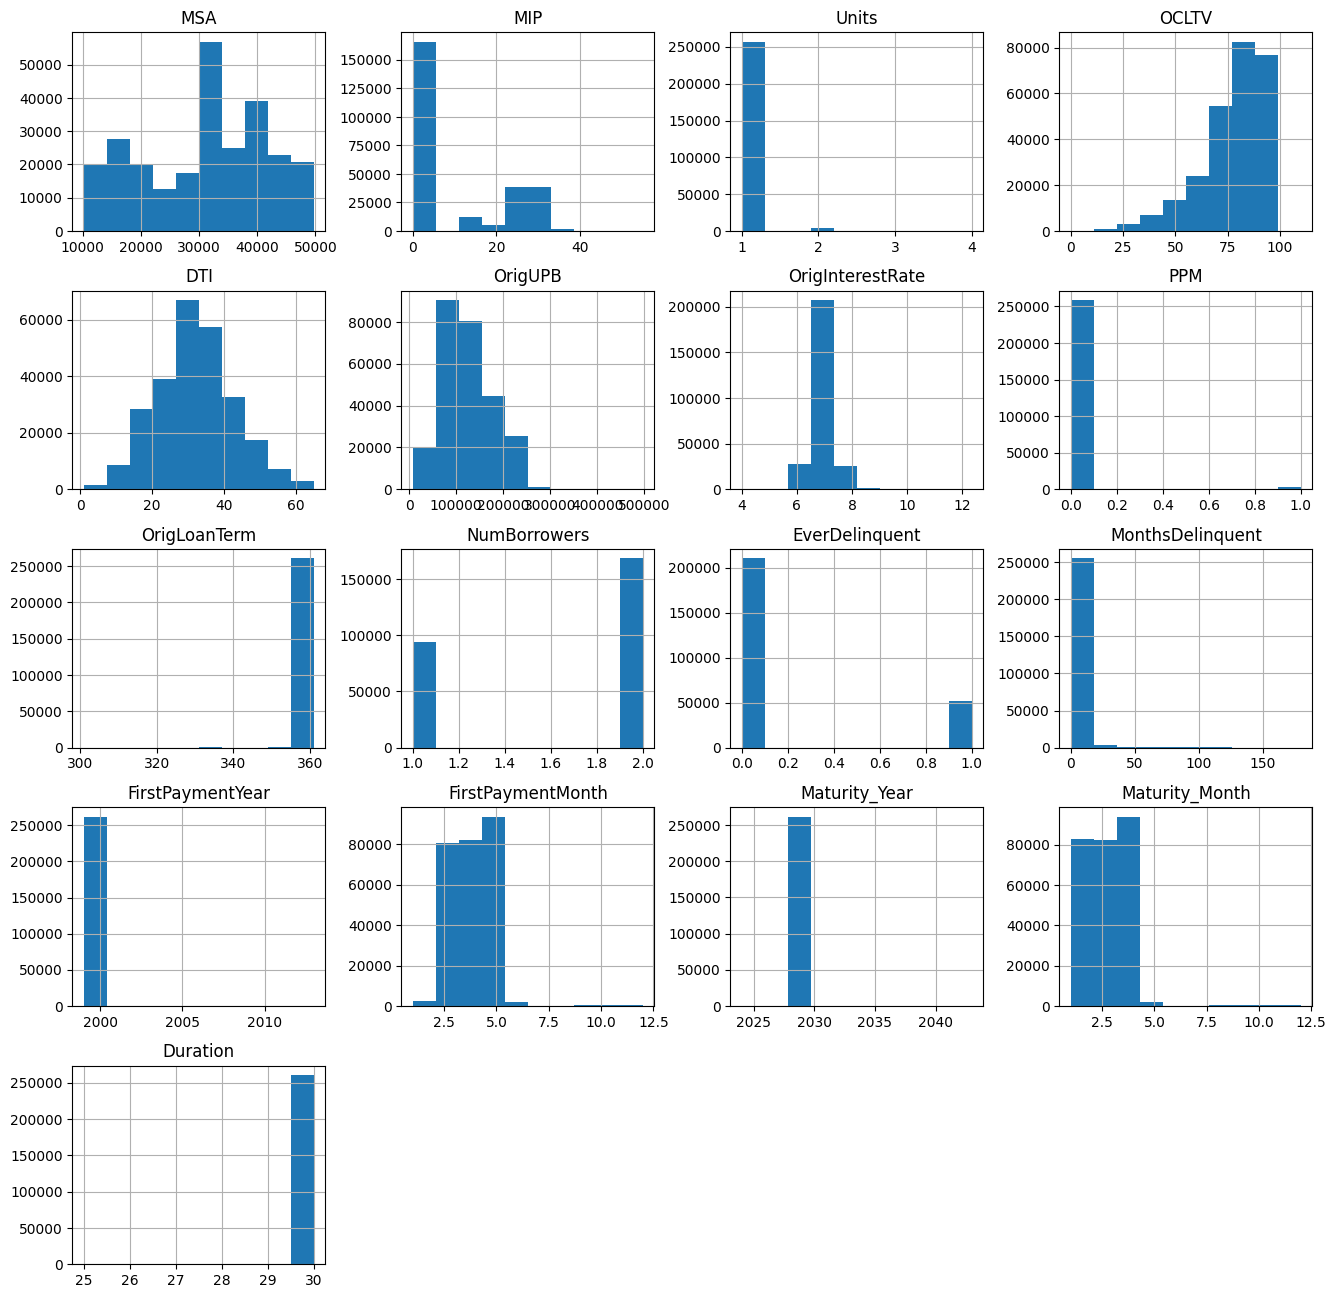

In [47]:
train_set.hist(figsize=(16,16))
plt.show()

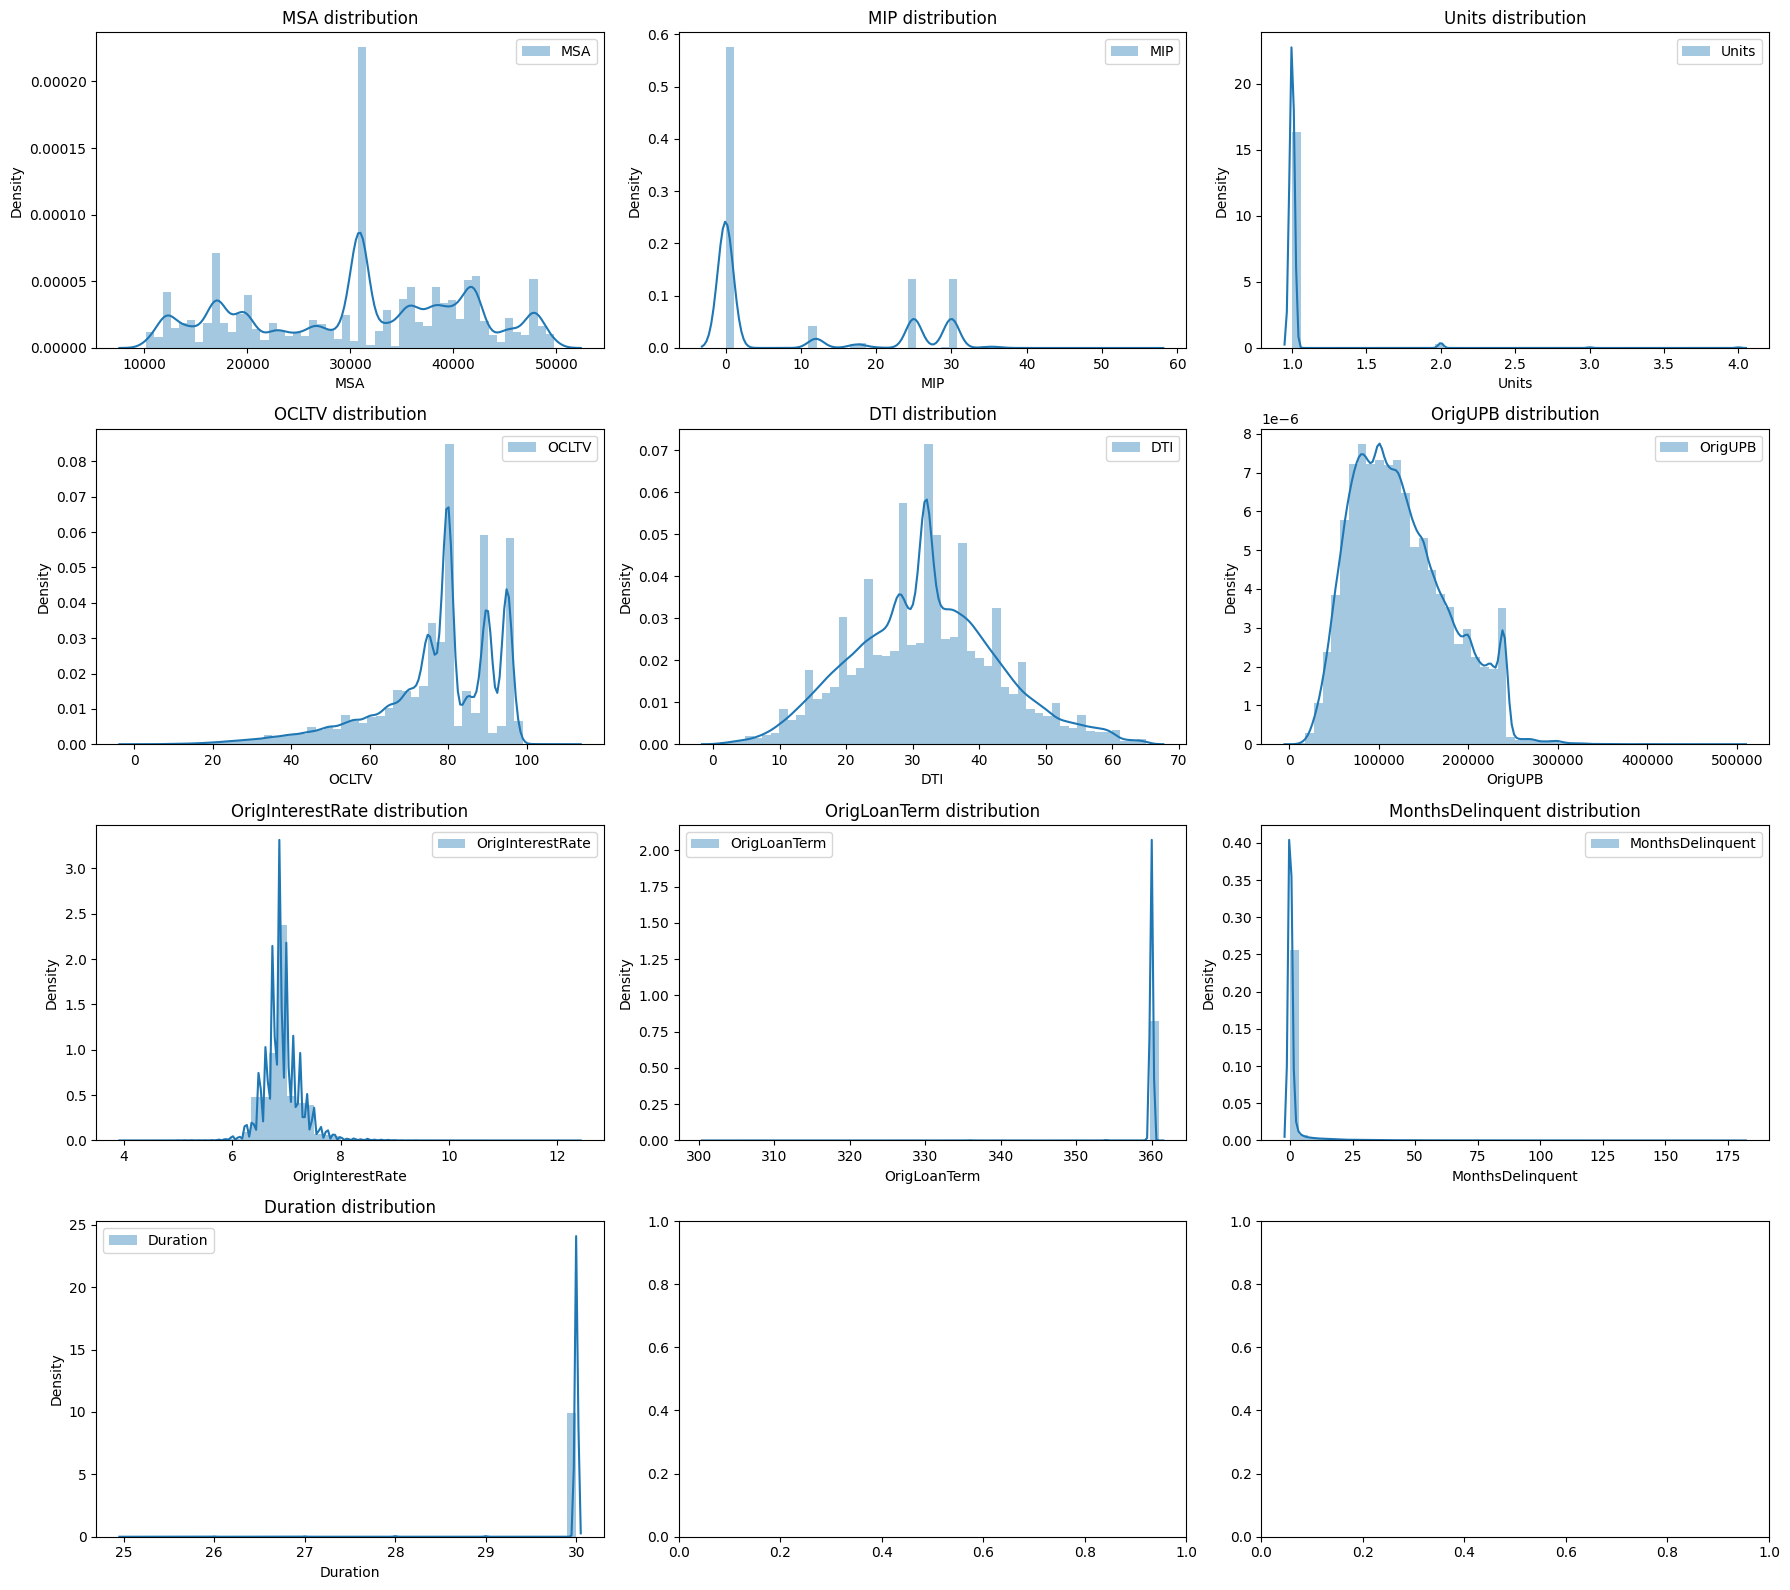

In [48]:
def plot_histograms(df, target_col, n_cols=2):
    n_rows = (len(df.columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df.columns.tolist()):
        ax = axes[i]
        sns.distplot(df[var_name], kde=True, ax=ax, label=var_name)      # plot the data
        
        ax.set_title(f"{var_name} distribution")
        ax.legend()

    plt.tight_layout()
    plt.show()
        
plot_histograms(train_set[numeric_cols], target, n_cols=3)

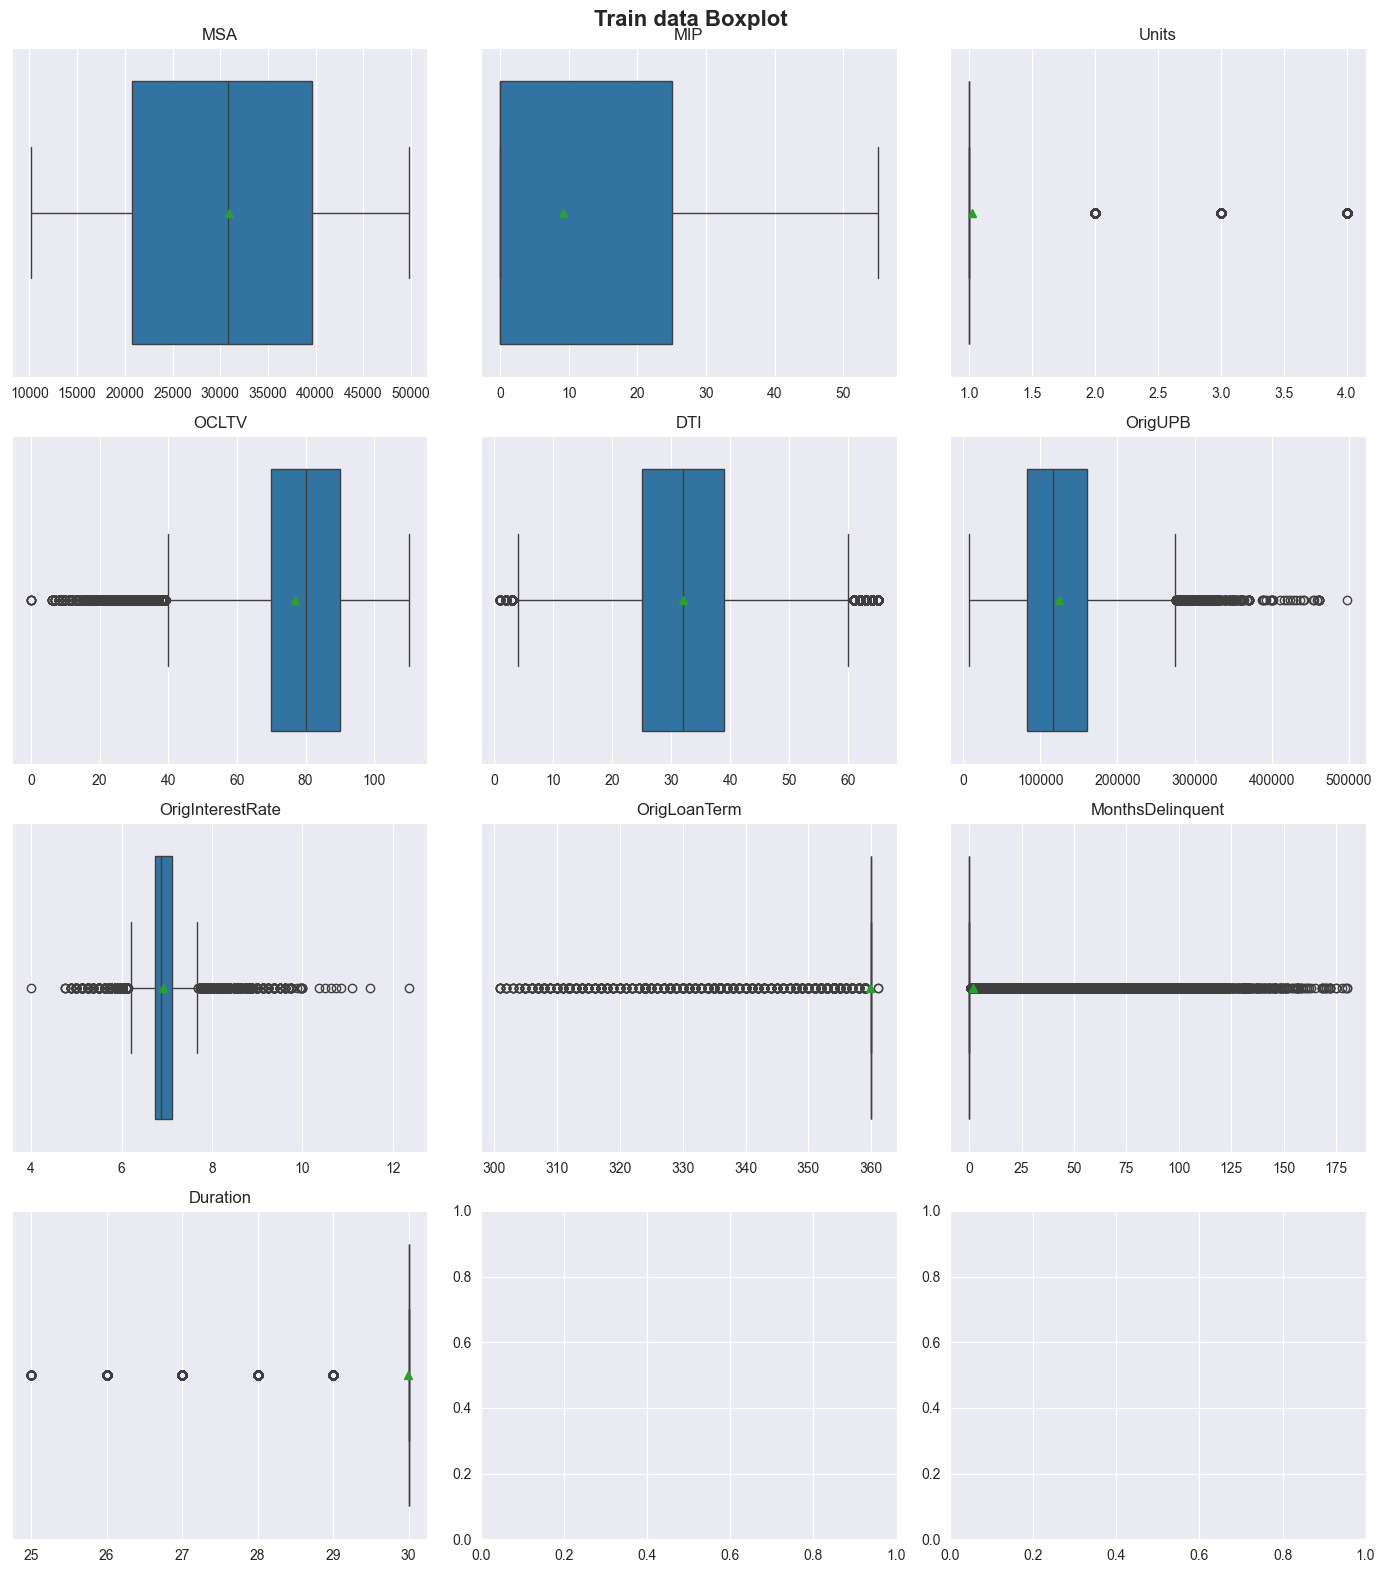

In [51]:
def plot_boxplot(df,title='',drop_cols=[],n_cols=3):
    sns.set_style('darkgrid')
    cols=df.columns.drop(drop_cols)
    n_rows =(len(cols)-1)//n_cols+1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14,4*n_rows))
    for i,var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=var_name, ax=ax, showmeans=True)
        ax.set_title(f'{var_name}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_boxplot(train_set[numeric_cols], n_cols=3, title='Train data')

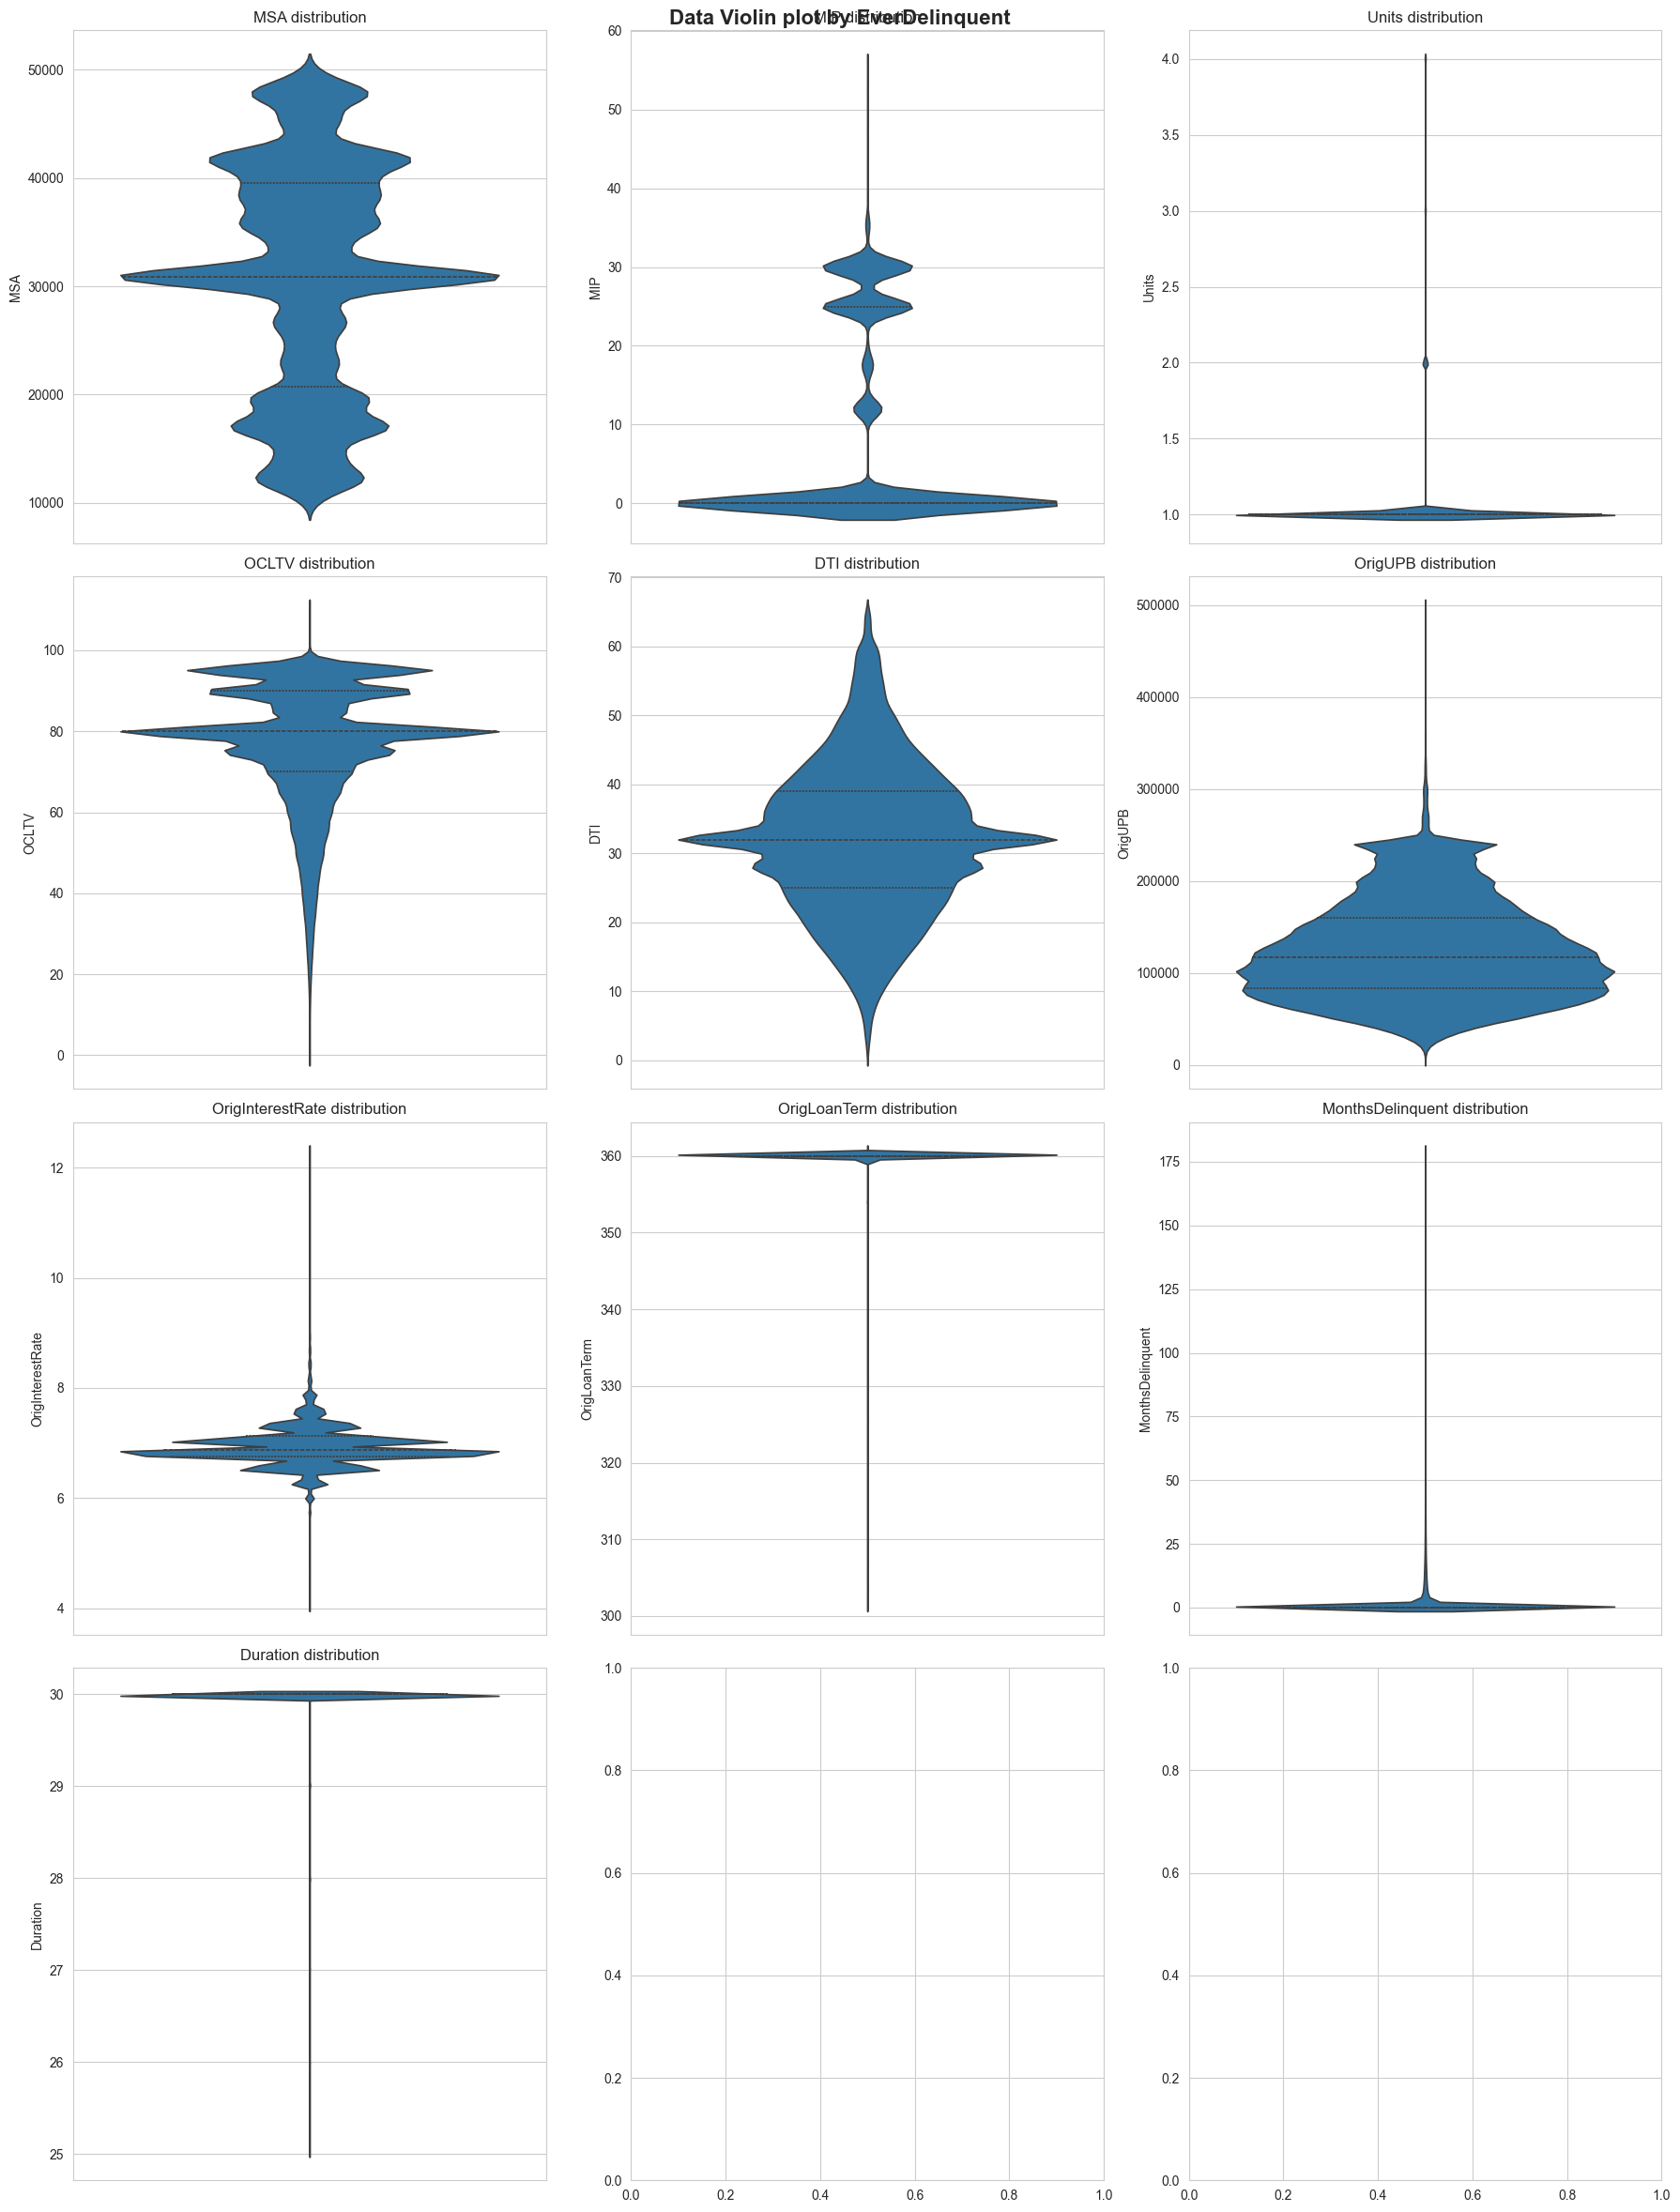

In [52]:
def plot_violinplot(df, hue, drop_cols=[], n_cols=2, title=''):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} distribution')

    fig.suptitle(f'{title} Violin plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_violinplot(train_set[numeric_cols+[target]], hue=target, n_cols=3, title='Data')

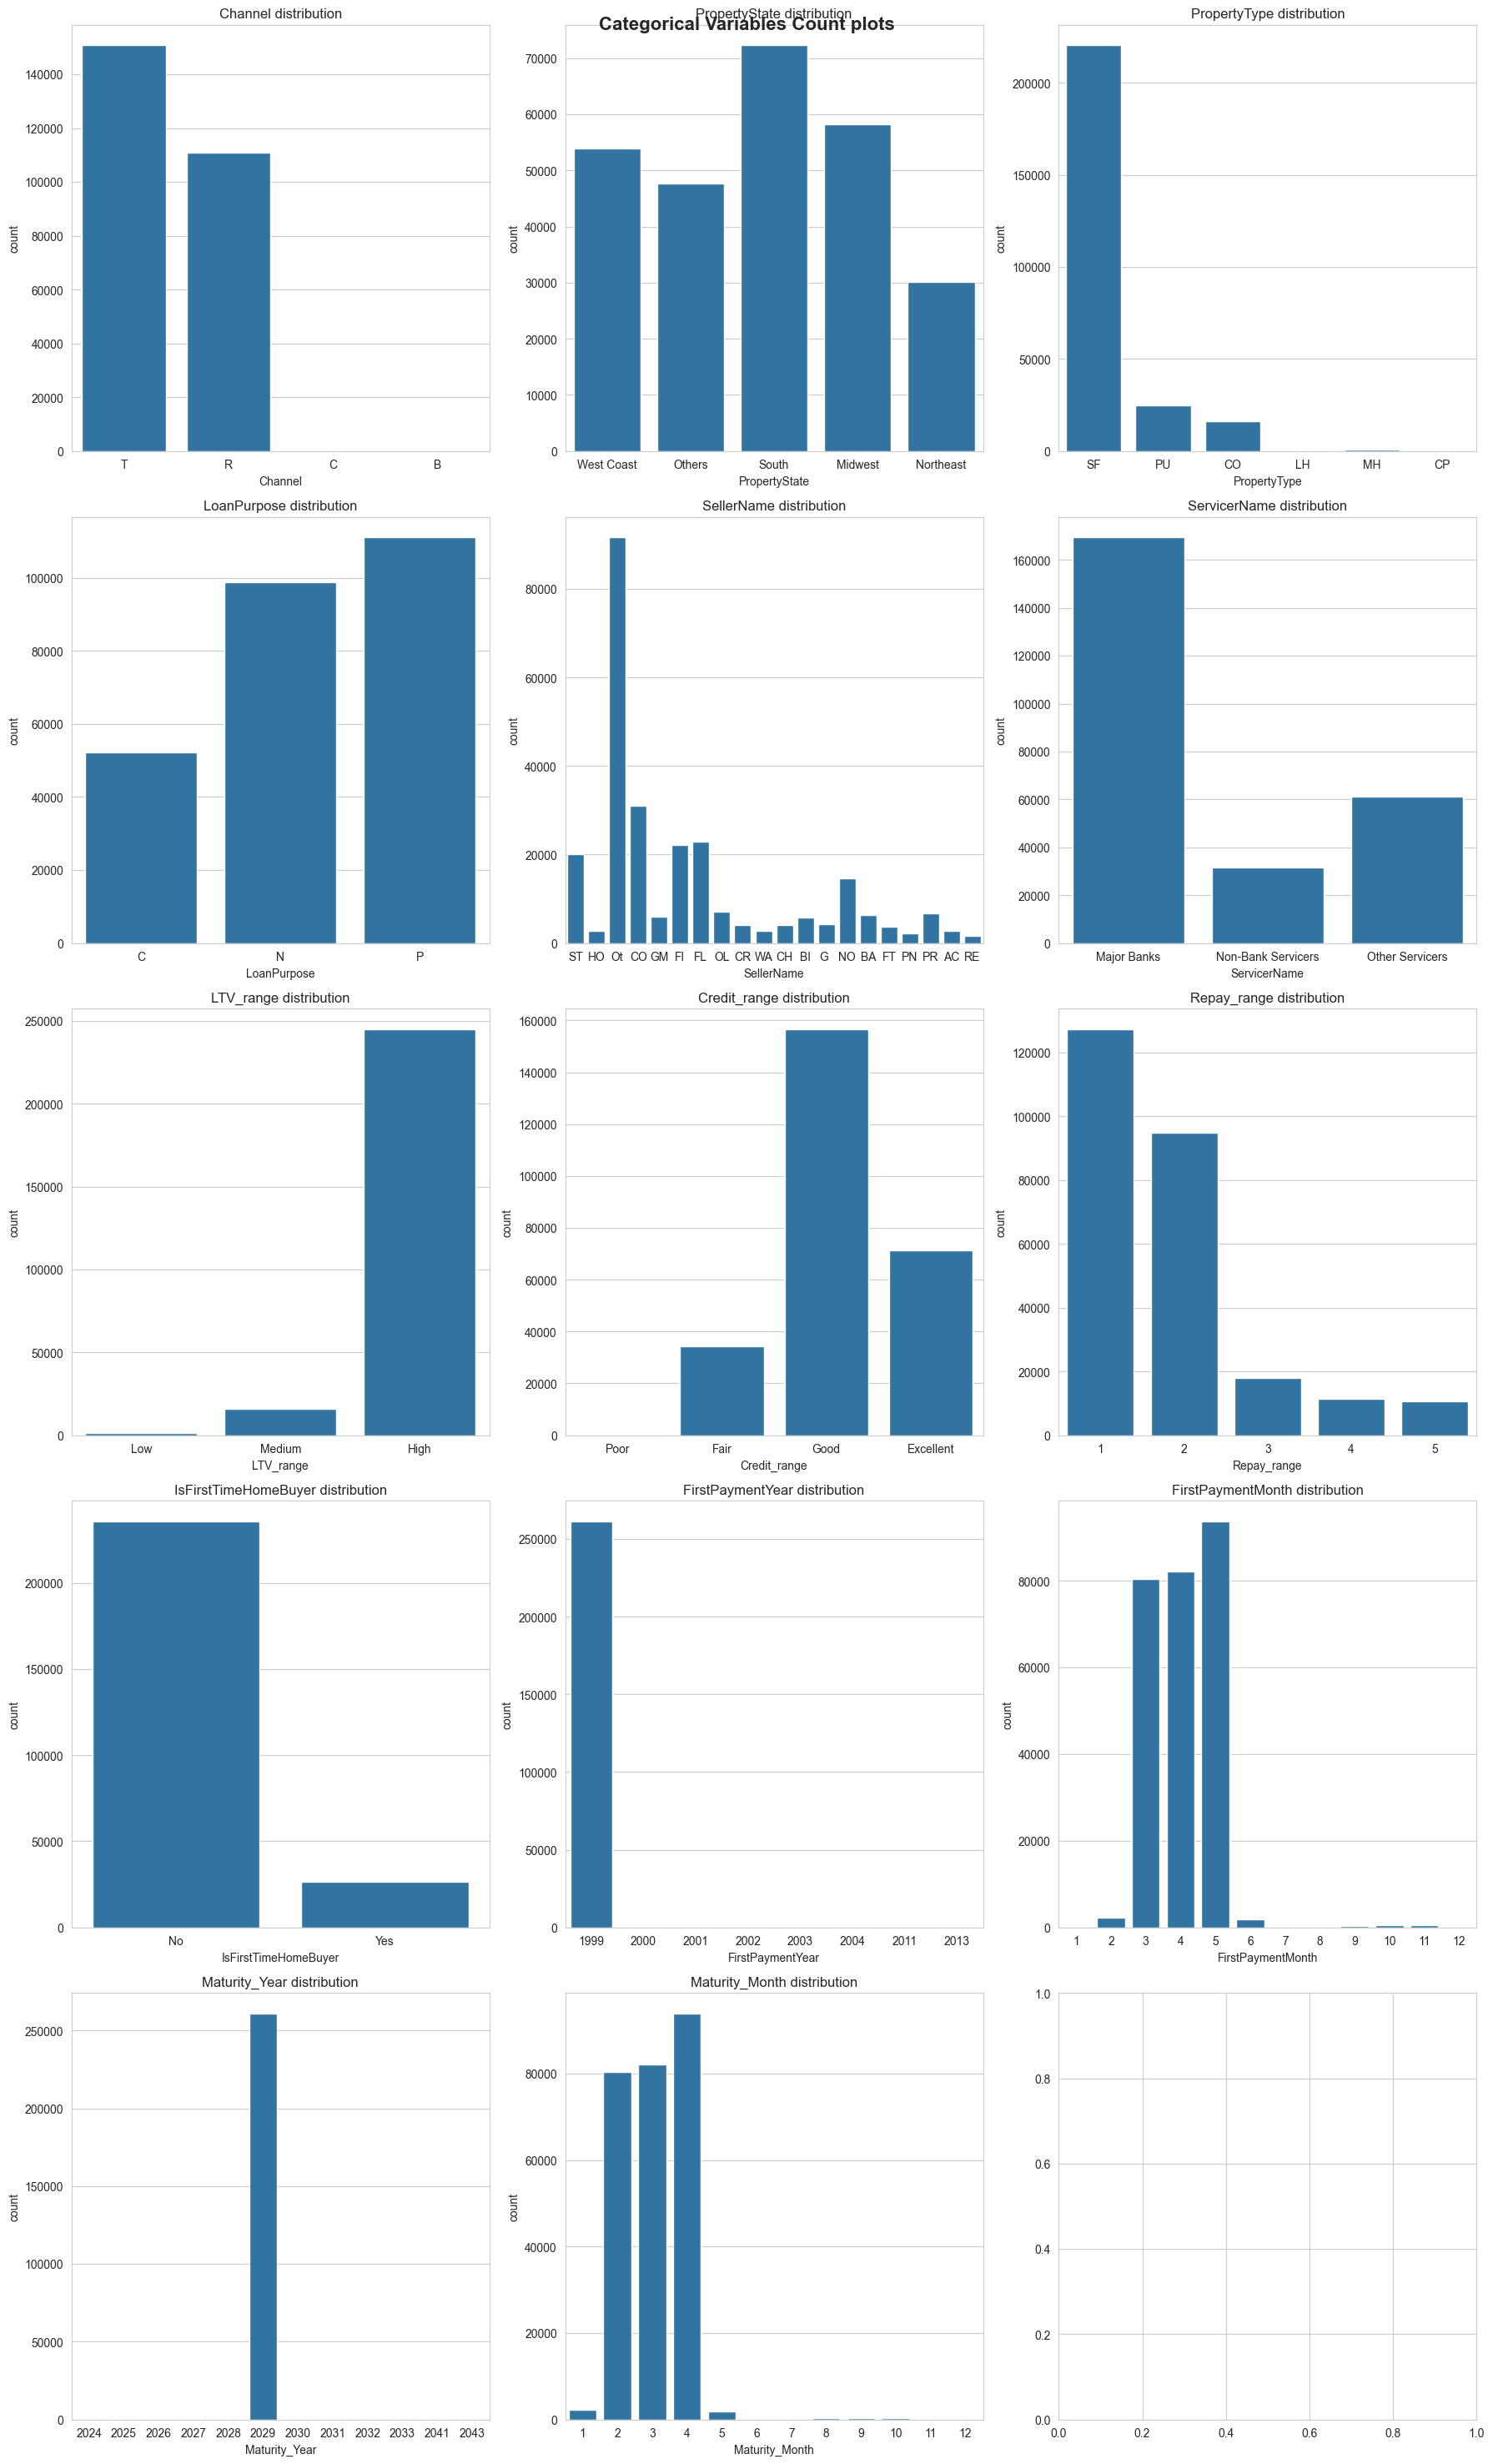

In [53]:
def plot_countplot(df, drop_cols=[], n_cols=2, title=''):
    sns.set_style('whitegrid')

    cols = df.columns.drop(drop_cols)
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.countplot(data=df, x=var_name, ax=ax)
        ax.set_title(f'{var_name} distribution')

    fig.suptitle(f'{title} Count plots', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_countplot(train_set[categ_cols], n_cols=3, title='Categorical Variables')

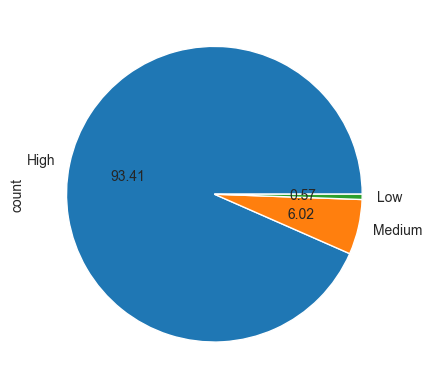

In [54]:
train_set['LTV_range'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

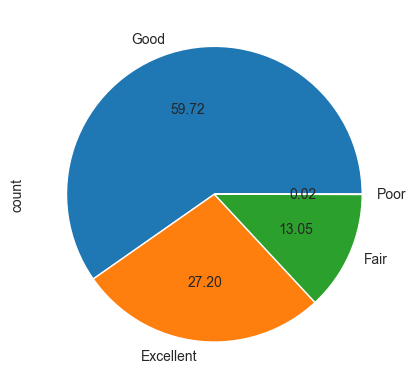

In [55]:
train_set['Credit_range'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

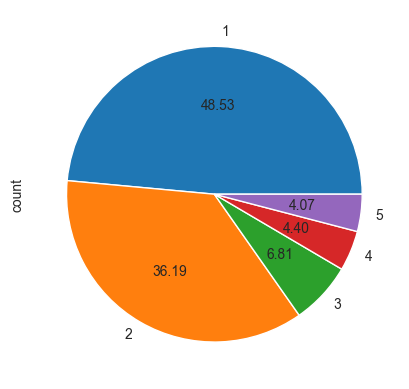

In [56]:
train_set['Repay_range'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

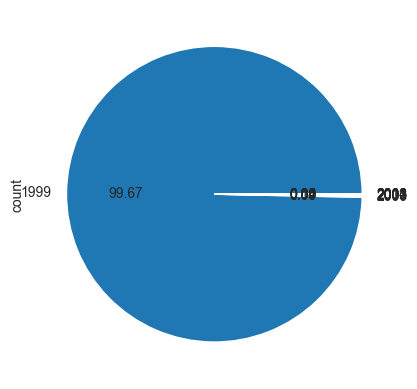

In [58]:
train_set['FirstPaymentYear'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

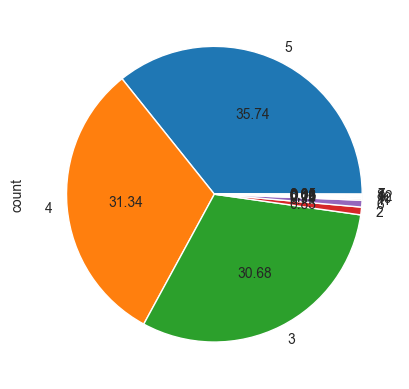

In [59]:
train_set['FirstPaymentMonth'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

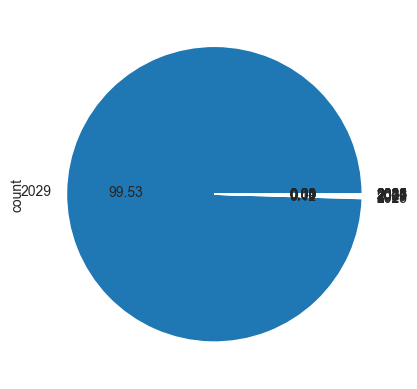

In [60]:
train_set['Maturity_Year'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

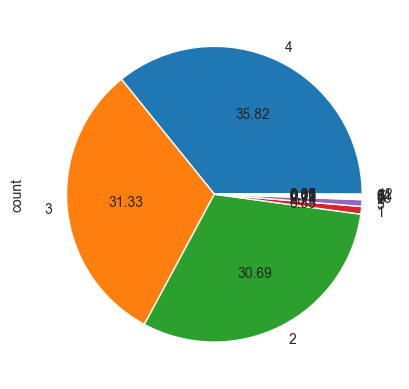

In [61]:
train_set['Maturity_Month'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [62]:
def plot_binary(dataframe, column):
    plt.figure(figsize=(10, 6))

    # Countplot for Machine failure
    ax = plt.subplot(1, 2, 1)
    ax = sns.countplot(x=column, data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.title(column, fontsize=20)

    # Pie chart for Outcome
    ax = plt.subplot(1, 2, 2)
    outcome_counts = dataframe[column].value_counts()
    ax = outcome_counts.plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
    ax.set_title("Pie Chart Graph", fontsize=20, color='Red', font='Lucida Calligraphy')

    # Display the plot
    plt.tight_layout()
    plt.show()

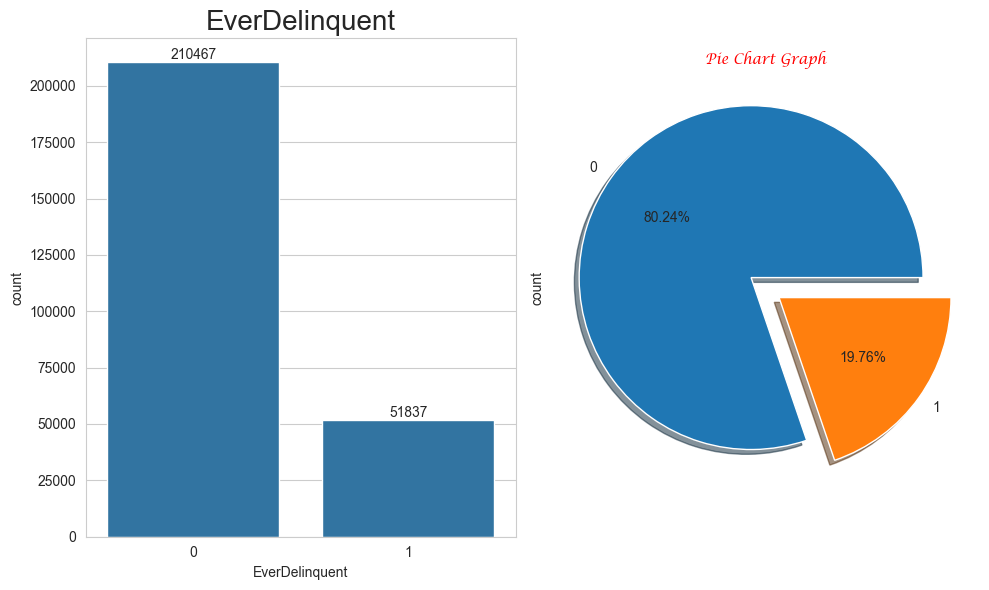

In [63]:
plot_binary(train_set, target)

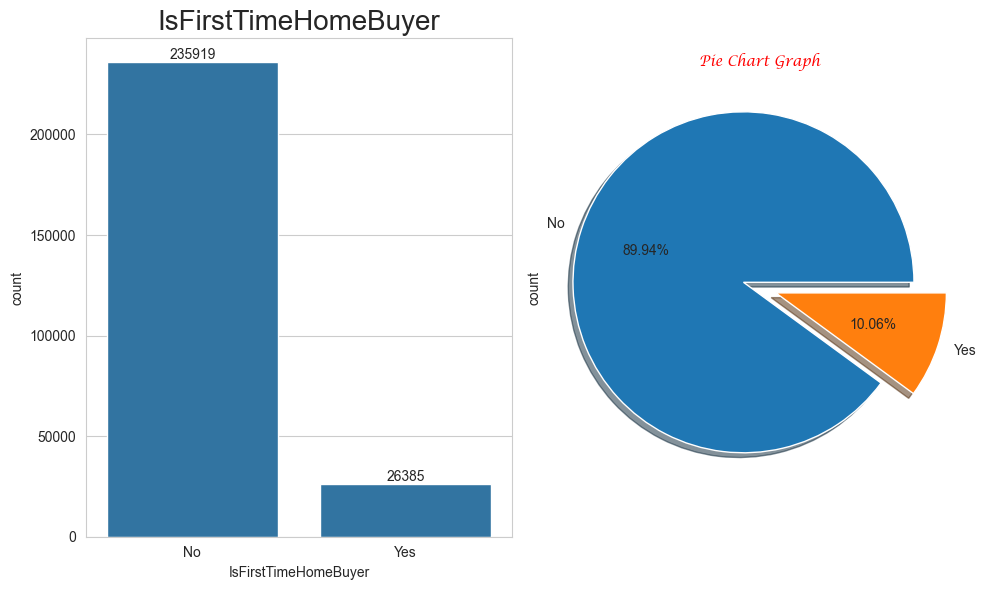

In [65]:
plot_binary(train_set, 'IsFirstTimeHomeBuyer')

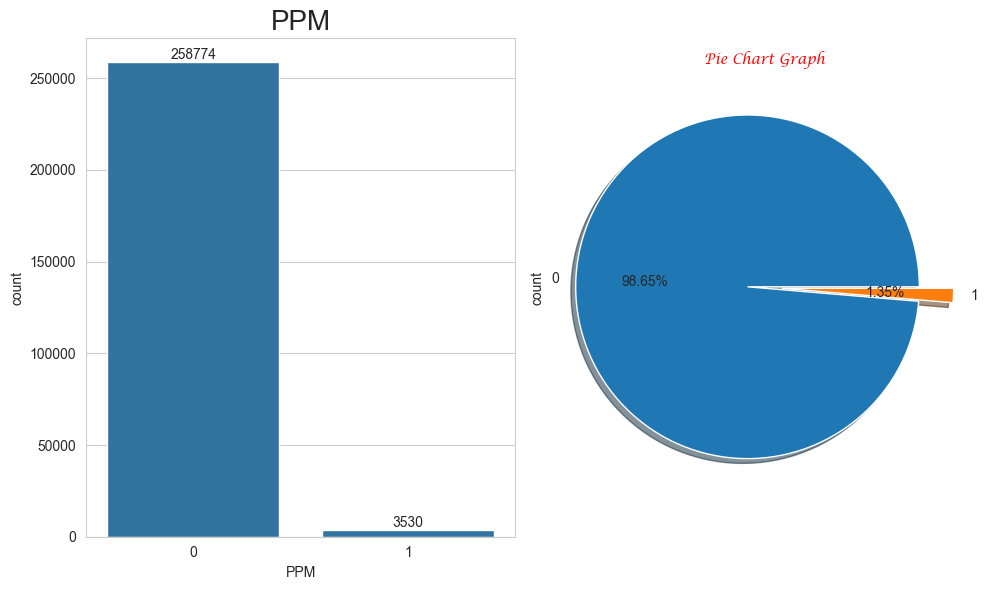

In [66]:
plot_binary(train_set, 'PPM')

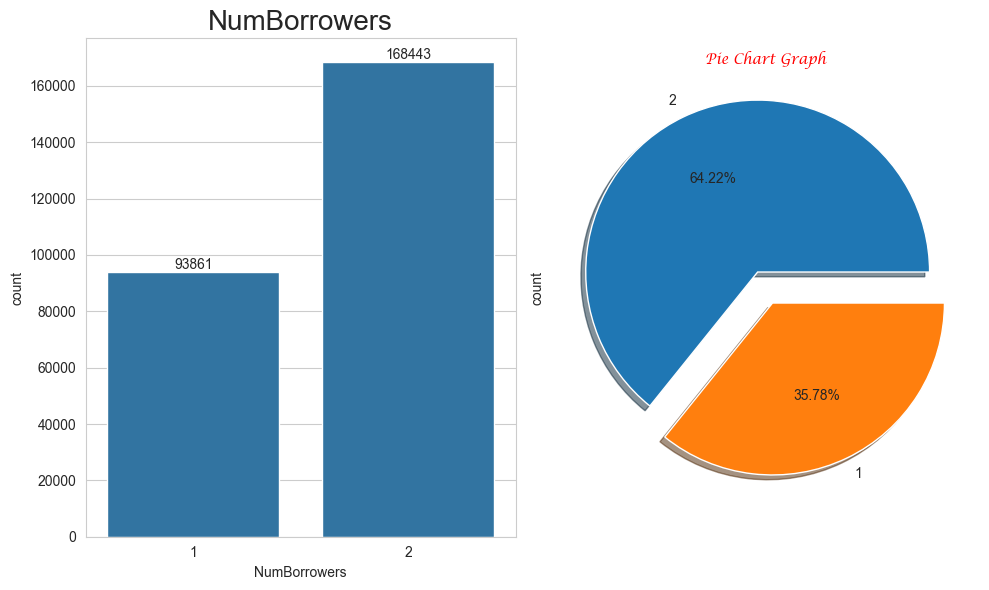

In [67]:
plot_binary(train_set, 'NumBorrowers')

In [68]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)

# function to calculate bivariate stats; Pearson' correlation, p-value and one-way ANOVA
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    # Create an empty DataFrame to store output
    output_df = pd.DataFrame(columns=['Type of bivariate analysis', 'Stat Name', 'Stat symbol', '+1/-1 * ', 'Effect size', 'p-value'])
    
    for col in df:
        if col != label:
            if df[col].isnull().sum() == 0:
                if is_numeric_dtype(df[col]):   # Only calculate r, 
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['Numeric - Numeric', 'Pearson', 'r', np.sign(r), abs(round(r, 3)), round(p,8)]
                    
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = ['Categoric - Numeric', 'ANOVA', 'F', '', round(F, 3), round(p,8)]
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

    return output_df.sort_values(by=['Effect size', 'Stat symbol'], ascending=[False, False])
 
pd.options.display.float_format = '{:.5f}'.format
bivstats(train_set, target)

,Type of bivariate analysis,Stat Name,Stat symbol,+1/-1 *,Effect size,p-value
Credit_range,Categoric - Numeric,ANOVA,F,,5321.43500,0.00000
Repay_range,Categoric - Numeric,ANOVA,F,,3358.68000,0.00000
LTV_range,Categoric - Numeric,ANOVA,F,,183.08700,0.00000
ServicerName,Categoric - Numeric,ANOVA,F,,153.77700,0.00000
PropertyState,Categoric - Numeric,ANOVA,F,,134.70400,0.00000
SellerName,Categoric - Numeric,ANOVA,F,,84.91200,0.00000
PropertyType,Categoric - Numeric,ANOVA,F,,60.01900,0.00000
LoanPurpose,Categoric - Numeric,ANOVA,F,,59.37000,0.00000
Channel,Categoric - Numeric,ANOVA,F,,49.14400,0.00000
MonthsDelinquent,Numeric - Numeric,Pearson,r,1.00000,0.42000,0.00000
